In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## importing the preprocessed csv file and not the original dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\prathu\Desktop\Flight Fare Pred\TrainPrePro.csv")

In [3]:
dataset.head()

Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0            0   3897           24              3        22       20   
1            2   7662            1              5         5       50   
2            2  13882            9              6         9       25   
3            1   6218           12              5        18        5   
4            1  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  ...  \
0             1           10               2             50  ...   
1            13           15               7             25  ...   
2             4           25              19              0  ...   
3            23           30               5             25  ...   
4            21           35               4             45  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 30 columns]

In [4]:
dataset.shape

(10682, 30)

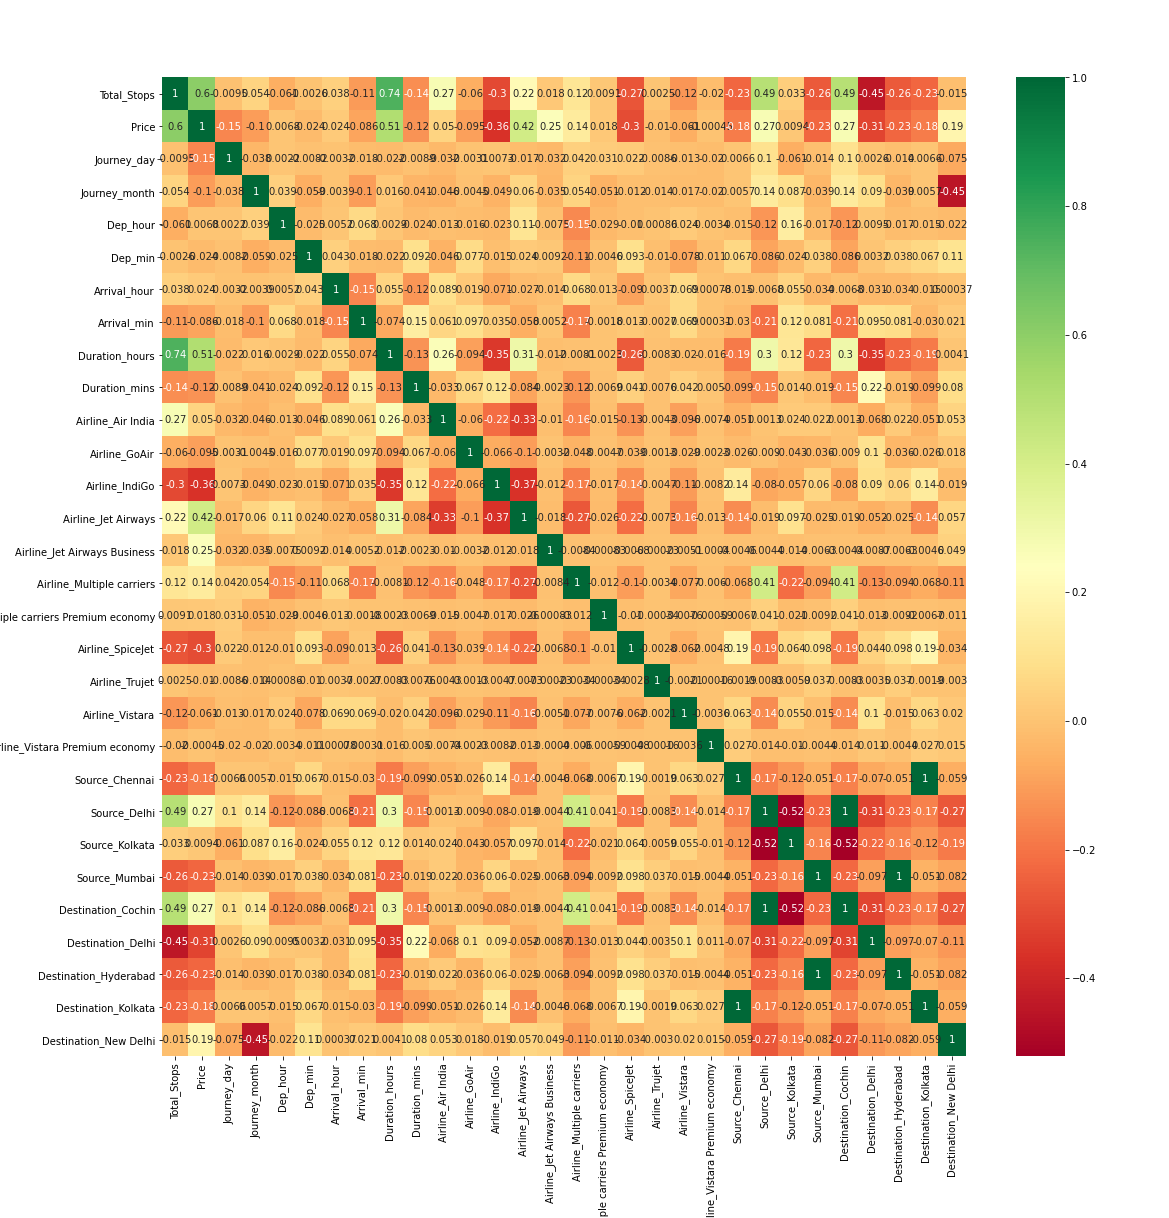

In [5]:
plt.figure(figsize = (18,18))
sns.heatmap(dataset.corr(), annot = True, cmap = "RdYlGn")
plt.show()

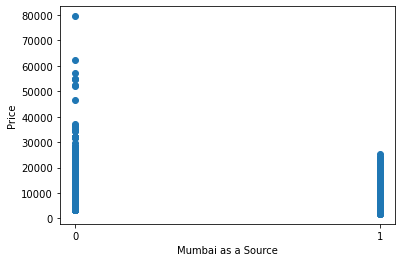

In [6]:
x = dataset["Source_Mumbai"]
y = dataset["Price"]
plt.plot(x,y,"o")
plt.ylabel("Price")
plt.xlabel("Mumbai as a Source")
plt.xticks([0,1])
plt.show()

<AxesSubplot:xlabel='Source_Mumbai', ylabel='Price'>

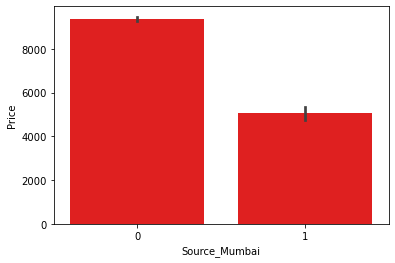

In [7]:
sns.barplot(x=x, y=y, color="red")

<AxesSubplot:xlabel='Source_Mumbai', ylabel='Price'>

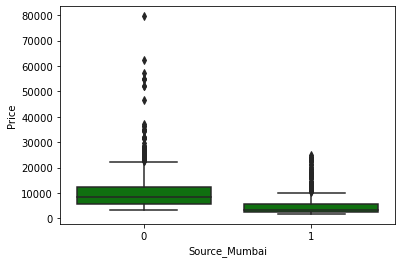

In [8]:
sns.boxplot(x=x, y=y, color="Green")  # we can see concentration and outliers throught it

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

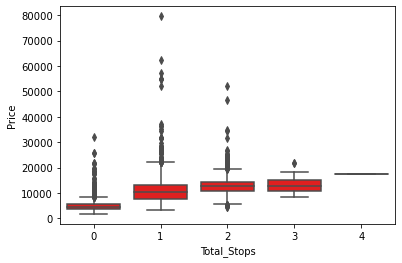

In [9]:
x2 = dataset["Total_Stops"]
y2 = dataset["Price"]
sns.boxplot(x=x2, y=y2, color="Red")

<AxesSubplot:xlabel='Journey_day', ylabel='Price'>

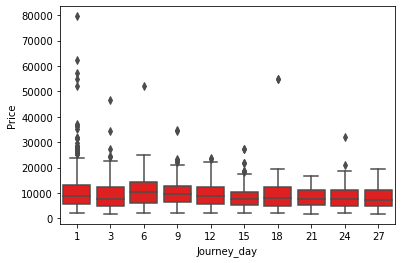

In [10]:
x3 = dataset["Journey_day"]
y3 = dataset["Price"]
sns.boxplot(x=x3, y=y3, color="Red")

<AxesSubplot:xlabel='Journey_month', ylabel='Price'>

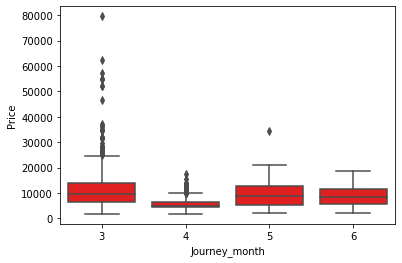

In [11]:
x4 = dataset["Journey_month"]
y4 = dataset["Price"]
sns.boxplot(x=x4, y=y4, color="Red")

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
X = dataset.drop("Price", axis=1)
y = dataset["Price"]
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [13]:
print(selection.feature_importances_)

[2.05976355e-01 1.43854130e-01 5.34642413e-02 2.45882690e-02
 2.17984900e-02 2.73341844e-02 1.84878072e-02 1.44294298e-01
 1.79654639e-02 9.08202160e-03 2.00313908e-03 1.89256292e-02
 1.40916606e-01 6.74627492e-02 1.80231757e-02 8.00513192e-04
 3.38531560e-03 9.73826958e-05 4.78236537e-03 7.70530424e-05
 5.44212137e-04 1.10522361e-02 3.16649333e-03 5.61660385e-03
 1.02157211e-02 1.45215430e-02 6.07000399e-03 4.26649854e-04
 2.50673474e-02]


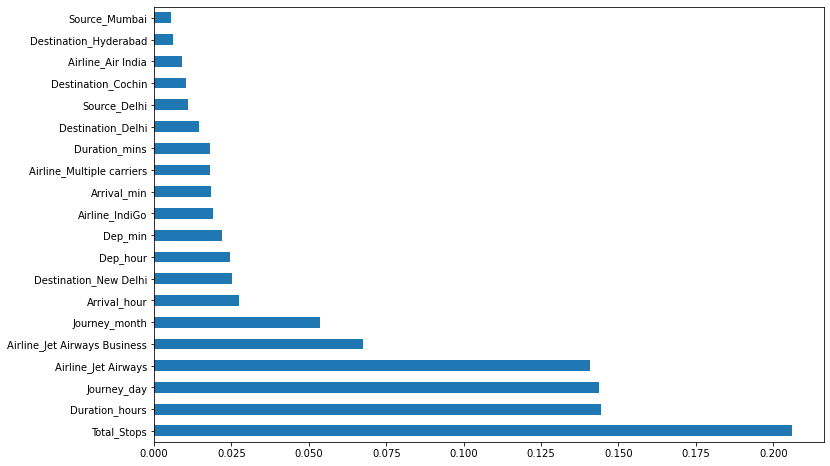

In [14]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [15]:
print(X.shape,y.shape)

(10682, 29) (10682,)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 29)
(2137, 29)
(8545,)
(2137,)


In [18]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [20]:
reg = RandomForestRegressor()
reg.fit(X=X_train_sc, y=y_train)

RandomForestRegressor()

In [21]:
reg.score(X_train_sc,y_train)

0.954209611615428

In [22]:
reg.score(X_test_sc,y_test)

0.7950139872340262

In [23]:
xgbc = XGBRegressor()
xgbc.fit(X=X_train_sc,y=y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
xgbc.score(X_train_sc,y_train)

0.9353790824718483

In [25]:
xgbc.score(X_test_sc,y_test)

0.8463369143799727

In [46]:
y_pred_xgb = xgbc.predict(X_test_sc)

In [49]:
for j in range(len(y_pred_xgb)):
    print(y_pred_xgb[j])

17249.031
6037.185
8097.6704
3732.2664
14556.141
9990.815
13630.509
5898.8066
12809.59
13885.871
4106.0244
8277.711
14285.487
3773.383
6140.307
2804.8442
4624.9985
5762.346
13862.774
8854.759
2136.342
5248.3555
6430.2305
5939.683
17220.16
5973.836
3194.5793
12177.195
6591.053
5877.3096
4213.208
13184.921
4836.9106
9936.499
4577.374
10693.997
9537.994
10252.112
12667.945
5610.611
3802.7861
4139.095
13815.427
6594.1406
21838.139
4106.9297
5500.547
6411.825
13691.221
10092.364
9027.729
12602.648
12037.737
7117.355
16341.458
8379.99
7977.5366
8181.586
13190.406
6412.349
13632.473
11442.531
4384.8086
6950.702
16840.385
10630.984
8390.7705
10406.733
15350.135
12970.192
5694.465
5048.926
6373.257
4161.4365
9786.858
7135.003
4055.7703
8583.15
12342.685
11788.9375
4411.4
9818.256
11717.024
9262.491
7567.5796
8420.337
3406.4072
13115.218
12283.128
12628.437
4356.8745
6780.309
8936.445
12718.132
4685.603
9707.811
6348.937
14568.519
3749.6616
11972.37
4371.6353
12604.222
10544.085
10818.119
26295.

In [26]:
y_pred = reg.predict(X_test_sc)

In [27]:
for i in range(len(y_pred)):
    print(y_pred[i])

16761.74
5606.86
8970.37
3677.83
15155.678666666667
9744.142142857143
12890.574833333334
5767.423583333334
14262.278333333335
13925.36
4086.52
9545.815
14206.058333333334
3858.572
6508.905
2977.03
4176.09
6179.8
14518.87
8291.65
2209.5957619047617
4666.61
6196.0525
5594.9
17335.70952380952
5515.49
3117.45
11936.516000000001
7208.0525
5229.4
4161.25
14445.25
4835.706666666667
9929.38
4834.65
9626.261666666665
8887.78
10056.8975
13192.5025
4874.05
3851.9466666666663
4283.76
14498.69
7490.643333333333
23651.27
4372.22
5750.086666666667
6038.36
15083.96
11191.486333333336
8792.33
13122.082583333333
12487.24
8258.466666666667
15465.202
7790.67
8426.758
8256.164333333334
14262.3
8331.93
13362.567500000003
13668.755
4054.49
7169.61
16751.75
10513.383333333335
8138.1
11251.5985
15802.333333333332
12998.52883333333
5590.07
5125.47
6231.435
4056.991333333333
8393.1275
6934.2315
3944.4645714285725
8431.98
12378.94
10584.19
4639.507666666666
8046.96
12423.633833333333
8700.88
6438.71
7427.97
3577.

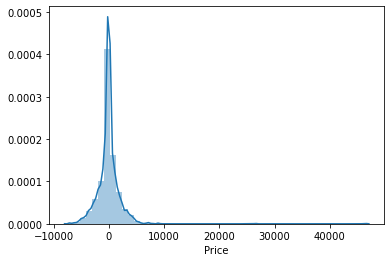

In [28]:
sns.distplot(y_test-y_pred)
plt.show()

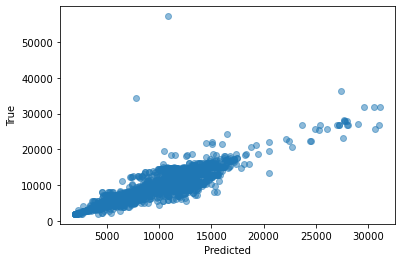

In [29]:
plt.scatter(y_pred, y_test, alpha = 0.5)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### For RandnomForestReg

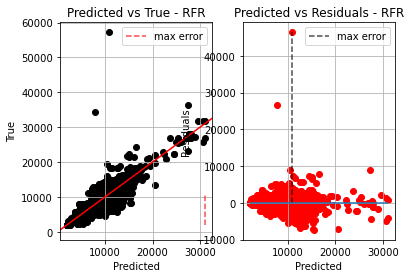

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(y_pred, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max(y_pred), ymin=min(y_test), ymax=max(y_test)-max(y_test-y_pred), color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True - RFR")
ax[0].legend()

residuals = y_test - y_pred
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred[max_idx]

ax[1].scatter(y_pred, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals - RFR")
ax[1].hlines(y=0, xmin=np.min(y_pred), xmax=np.max(y_pred))
ax[1].legend()
plt.show()


In [55]:
from sklearn import metrics
print('MAE:', (metrics.mean_absolute_error(y_test, y_pred))/100)
print('MSE:', (metrics.mean_squared_error(y_test, y_pred))/100)
print('RMSE:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))/100)

MAE: 11.859711499632926
MSE: 44199.19952925274
RMSE: 21.023605668213232


### For XGb

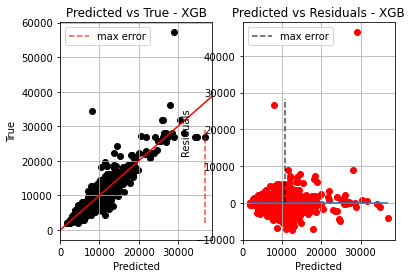

In [56]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax1[0].scatter(y_pred_xgb, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax1[0])
ax1[0].vlines(x=max(y_pred_xgb), ymin=min(y_test), ymax=max(y_test)-max(y_test-y_pred_xgb), color='red', linestyle='--', alpha=0.7, label="max error")
ax1[0].grid(True)
ax1[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True - XGB")
ax1[0].legend()

residuals_xgb = y_test - y_pred_xgb
max_error_xgb = max(residuals_xgb) if abs(max(residuals_xgb)) > abs(min(residuals_xgb)) else min(residuals_xgb)
max_idx_xgb = list(residuals_xgb).index(max(residuals_xgb)) if abs(max(residuals_xgb)) > abs(min(residuals_xgb)) else list(residuals_xgb).index(min(residuals_xgb))
max_true_xgb, max_pred_xgb = y_test[max_idx_xgb], y_pred[max_idx_xgb]

ax1[1].scatter(y_pred_xgb, residuals, color="red")
ax1[1].vlines(x=max_pred_xgb, ymin=0, ymax=max_error_xgb, color='black', linestyle='--', alpha=0.7, label="max error")
ax1[1].grid(True)
ax1[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals - XGB")
ax1[1].hlines(y=0, xmin=np.min(y_pred_xgb), xmax=np.max(y_pred_xgb))
ax1[1].legend()
plt.show()


In [57]:
print('MAE:', (metrics.mean_absolute_error(y_test, y_pred_xgb))/100)
print('MSE:', (metrics.mean_squared_error(y_test, y_pred_xgb))/100)
print('RMSE:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))/100)

MAE: 11.354894150701371
MSE: 33132.92107083523
RMSE: 18.20245067864084


## Conclusions: 
Training data:<br>
        <br>- RandomForestReg - 95.42%
        <br>- XGB             - 93.54%

Testing data:<br>
        <br>- RandomForestReg - 79.5%
        <br>- XGB             - 84.6%